<a href="https://colab.research.google.com/github/sushree-akankshya-panda/Machine-Learning/blob/main/Copy_of_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Step 2: Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Reshape (28x28 = 784)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# Step 4: Scale pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Step 5: One hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 6: Build the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(784,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))   # 10 classes (digits 0-9)

# Step 7: Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 8: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Step 9: Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8078 - loss: 0.6710 - val_accuracy: 0.9522 - val_loss: 0.1788
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9512 - loss: 0.1687 - val_accuracy: 0.9583 - val_loss: 0.1406
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9680 - loss: 0.1118 - val_accuracy: 0.9659 - val_loss: 0.1141
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9693 - val_loss: 0.0973
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9821 - loss: 0.0610 - val_accuracy: 0.9699 - val_loss: 0.0939
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.0941
Test Accuracy: 0.9734


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9163 - loss: 0.2959 - val_accuracy: 0.9786 - val_loss: 0.0657
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9833 - loss: 0.0550 - val_accuracy: 0.9836 - val_loss: 0.0525
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9897 - loss: 0.0310 - val_accuracy: 0.9854 - val_loss: 0.0435
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9844 - val_loss: 0.0476
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9873 - val_loss: 0.0429
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0545
Test Loss: 0.0429
Test Accuracy: 0.9873
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted digit for the first test image: 7
Actual digit for the first test image: 7


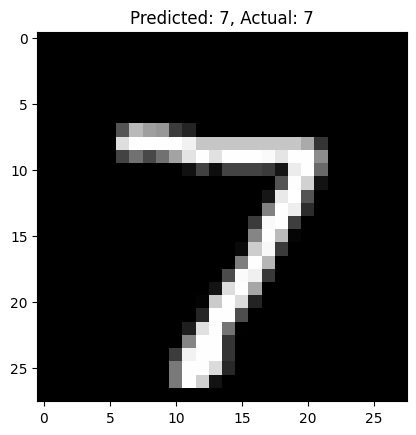

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN (add a channel dimension for grayscale)
# For a simple dense network, this step is not strictly necessary as we can flatten later.
# For CNNs, it's typically (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 10 classes for digits 0-9
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 7. Make predictions (optional)
predictions = model.predict(x_test)
# Example: print the predicted digit for the first test image
print(f"Predicted digit for the first test image: {np.argmax(predictions[0])}")
print(f"Actual digit for the first test image: {y_test[0]}")

# Visualize a sample image (optional)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.show()

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Step 2: Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Reshape (28x28 = 784)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# Step 4: Scale pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Step 5: One hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 6: Build the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(784,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))   # 10 classes (digits 0-9)

# Step 7: Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 8: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Step 9: Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8203 - loss: 0.6509 - val_accuracy: 0.9482 - val_loss: 0.1820
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9538 - loss: 0.1597 - val_accuracy: 0.9595 - val_loss: 0.1398
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9672 - loss: 0.1151 - val_accuracy: 0.9622 - val_loss: 0.1266
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9678 - val_loss: 0.1072
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9799 - loss: 0.0659 - val_accuracy: 0.9684 - val_loss: 0.1066
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1109
Test Accuracy: 0.9696
